# Data Case Assessment 
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("load imports")

load imports


In [2]:
# load the data 
transactions = pd.read_excel("REF Case Assessment - Data Visualization Engineer Data.xlsx", sheet_name="Transactions")
articles = pd.read_excel("REF Case Assessment - Data Visualization Engineer Data.xlsx", sheet_name="Article Master")
standards = pd.read_excel("REF Case Assessment - Data Visualization Engineer Data.xlsx", sheet_name="Packing Time Standards")

print("transactions shape: ", transactions.shape)
print("articles shape: ", articles.shape)
print("standards shape: ", standards.shape)

trasaction shape:  (3747, 23)
articles shape:  (359, 2)
standards shape:  (1, 25)


## Exploratory Data Analysis
---

### Transactions

In [3]:
transactions.head()

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,DEVICE_CODE,SHIP_LINE_ID,GIFT_FLAG,FROM_AREA_CODE,TO_AREA_CODE,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY
0,00006XB1YO,DC01,2021-11-02 08:08:21,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER1,LSTPCK,...,7,SLN00EYGRP,0,PICK,RDTS000001,31-04-04-01,7,eComm Canada,D000000FFLR3,1
1,00006XBDUP,DC01,2021-11-02 08:35:51,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER2,LSTPCK,...,67,SLN00EYAPJ,0,PICK,RDTS000001,69-07-02-02,67,eComm Canada,D000000FG9V3,1
2,00006XBF7O,DC01,2021-11-02 08:41:32,2021-11-02,8,SR,REPLEN,RETAIL,USER3,LSTPCK,...,12,SLN00EYFK9,0,PICK,RDTS000001,75-20-02-03,12,Replenishment,D000000FG9YV,1
3,00006XBD97,DC01,2021-11-02 08:32:10,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER4,ASSUMEDPCK,...,50,SLN00EYH15,0,PICK,RDTS000001,56-15-03-03,50,eComm Canada,D000000FG9T8,1
4,00006XBCB6,DC01,2021-11-02 08:24:57,2021-11-02,8,SR,REPLEN,RETAIL,USER5,LSTPCK,...,35,SLN00EXO7V,0,PICK,RDTS000001,23-19-02-02,35,Replenishment,D000000FG9NO,5


In [4]:
transactions["ACTION_CODE"].unique()

array(['LSTPCK', 'ASSUMEDPCK', 'PKOCLOSE', 'IDNTFY', 'MANFST',
       'INVSTSCHG'], dtype=object)

In [5]:
transactions.describe()

,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_NUMBER,ORDER_LINE_ITEM
count,3747,3747,3747.0,3.747000e+03,3747.000000
mean,2021-11-02 08:29:45.965038848,2021-11-02 00:00:00,8.0,1.579563e+08,926.005338
min,2021-11-02 08:00:04,2021-11-02 00:00:00,8.0,8.254480e+07,1.000000
25%,2021-11-02 08:12:56,2021-11-02 00:00:00,8.0,8.261458e+07,2.000000
50%,2021-11-02 08:28:19,2021-11-02 00:00:00,8.0,8.261459e+07,340.000000
75%,2021-11-02 08:46:52,2021-11-02 00:00:00,8.0,2.628931e+08,1620.000000
max,2021-11-02 08:59:58,2021-11-02 00:00:00,8.0,2.630143e+08,4310.000000
std,NaN,NaN,0.0,8.892821e+07,1170.263202


In [6]:
transactions["TRANSACTION_ID"].unique().shape 

# each transaction has a unique ID

(3747,)

In [7]:
# understand what users have PKOCLOSE transaction records, also if they perform other actions 

user_actions = transactions.groupby("USER_ID")["ACTION_CODE"].unique().reset_index()
user_actions["ACTION_CODE"] = user_actions["ACTION_CODE"].apply(list)

# filter for users who have done PKOCLOSE 
pkoclose_users = user_actions[user_actions["ACTION_CODE"].apply(lambda x: "PKOCLOSE" in x)].copy()

pkoclose_users.loc[:, "OTHER_ACTIONS"] = pkoclose_users["ACTION_CODE"].apply(
    lambda x: [action for action in x if action != "PKOCLOSE"]
)
pkoclose_users.loc[:, "HAS_OTHER_ACTIONS"] = pkoclose_users["OTHER_ACTIONS"].apply(lambda x: len(x) > 0)

pkoclose_users[["USER_ID", "ACTION_CODE", "HAS_OTHER_ACTIONS", "OTHER_ACTIONS"]]


,USER_ID,ACTION_CODE,HAS_OTHER_ACTIONS,OTHER_ACTIONS
4,USER13,"[PKOCLOSE, MANFST]",True,[MANFST]
12,USER20,[PKOCLOSE],False,[]
14,USER22,"[PKOCLOSE, MANFST]",True,[MANFST]
15,USER23,"[PKOCLOSE, MANFST]",True,[MANFST]
16,USER24,[PKOCLOSE],False,[]
17,USER25,"[PKOCLOSE, MANFST]",True,[MANFST]
19,USER27,"[PKOCLOSE, MANFST]",True,[MANFST]
20,USER28,[PKOCLOSE],False,[]
25,USER6,"[PKOCLOSE, MANFST]",True,[MANFST]
27,USER8,"[PKOCLOSE, MANFST]",True,[MANFST]


In [8]:
transactions.info()
transactions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3747 entries, 0 to 3746
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRANSACTION_ID           3747 non-null   object        
 1   WAREHOUSE_ID             3747 non-null   object        
 2   TRANSACTION_TIMESTAMP    3747 non-null   datetime64[ns]
 3   DATE                     3747 non-null   datetime64[ns]
 4   HOUR                     3747 non-null   int64         
 5   ORDER_TYPE               3747 non-null   object        
 6   ORDER_TYPE_CATEGORY      3747 non-null   object        
 7   ORDER_CHANNEL            3747 non-null   object        
 8   USER_ID                  3747 non-null   object        
 9   ACTION_CODE              3747 non-null   object        
 10  ORDER_NUMBER             3747 non-null   int64         
 11  ORDER_LINE_ITEM          3747 non-null   int64         
 12  ARTICLE                  3747 non-

TRANSACTION_ID             0
WAREHOUSE_ID               0
TRANSACTION_TIMESTAMP      0
DATE                       0
HOUR                       0
ORDER_TYPE                 0
ORDER_TYPE_CATEGORY        0
ORDER_CHANNEL              0
USER_ID                    0
ACTION_CODE                0
ORDER_NUMBER               0
ORDER_LINE_ITEM            0
ARTICLE                    0
DEVICE_CODE                0
SHIP_LINE_ID               0
GIFT_FLAG                  0
FROM_AREA_CODE             0
TO_AREA_CODE               0
FROM_STORAGE_LOCATION      0
TO_STORAGE_LOCATION        0
ORDER_CATEGORY             0
INVENTORY_DETAIL_NUMBER    0
QUANTITY                   0
dtype: int64

### Articles

In [9]:
articles.head()

,MATERIAL,DEPARTMENT
0,31352005,Pant
1,54636002,Neckwear
2,54636051,Neckwear
3,56641182,Sweater
4,57814001,T-shirt


In [10]:
articles["DEPARTMENT"].unique()

array(['Pant', 'Neckwear', 'Sweater', 'T-shirt', 'Jacket', 'Headwear',
       'Coat', 'Dress', 'Handwear', 'Blouse', 'Hosiery', 'Face Masks',
       'Skirt'], dtype=object)

In [11]:
articles["MATERIAL"].unique().shape

(359,)

### Standards

In [12]:
standards.head()

,BASICMOVE_STANDARD,BASICPROC_STANDARD,BASICSCAN_STANDARD,BASICWRAP_STANDARD,BASICPACK_STANDARD,BELT_STANDARD,BLOUSE_STANDARD,COAT_STANDARD,DRESS_STANDARD,FOOTWEAR_STANDARD,...,SKIRT_STANDARD,SWEATER_STANDARD,TSHIRT_STANDARD,UNDERWEAR_STANDARD,BAG_STANDARD,GIFTITEM_STANDARD,HANDWEAR_STANDARD,SMALLGOOD_STANDARD,JEWELRY_STANDARD,SWIMWEAR_STANDARD
0,13.76,9.12,11.56,17.7,35.2,24.86,27.58,43.21,19.71,7.76,...,19.95,30.02,23.83,11.07,26.7,15.76,10.19,8.19,8.76,3


## Calculate Transaction Duration 
---
Packing transactions are of type `PKOCLOSE`. This suggests that the timestamp recorded marks the end of the packing task. Under this assumption, the duration taken for packing will be calculated using the timestamp of the employees previous action.

#### End (PKOCLOSE)−Start (Previous Event)


In [13]:
# to reduce unnecessary work, only keep employees who have performed a PKOCLOSE transaction
keep = pkoclose_users["USER_ID"]

filtered_transactions = transactions[transactions["USER_ID"].isin(keep)].copy()
filtered_transactions.head()

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,DEVICE_CODE,SHIP_LINE_ID,GIFT_FLAG,FROM_AREA_CODE,TO_AREA_CODE,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY
5,00006XBCWX,DC01,2021-11-02 08:29:50,2021-11-02,8,E01,ECOMM CA,ECOMMERCE,USER6,PKOCLOSE,...,STNPACK-016,SLN00EY868,0,WRKS,PACK,STNPACK-016,STNPACK-016-STG,eComm Canada,D000000FG6CB,1
9,00006XBK8H,DC01,2021-11-02 08:54:17,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027,SLN00EY8EH,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG6Q2,1
24,00006XBKY7,DC01,2021-11-02 08:59:04,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY8PQ,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6DL,2
46,00006XBD92,DC01,2021-11-02 08:32:10,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER20,PKOCLOSE,...,STNPACK-059,SLN00EY8KJ,0,WRKS,PACK,STNPACK-059,STNPACK-059-STG,eComm USA S321,D000000FG6GI,1
75,00006XBB2C,DC01,2021-11-02 08:23:50,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER22,PKOCLOSE,...,STNPACK-024,SLN00EY8B3,0,WRKS,PACK,STNPACK-024,STNPACK-024-STG,eComm USA S321,D000000EQTE2,1


In [14]:
filtered_transactions.shape

(412, 23)

In [15]:
filtered_transactions.sort_values(by=["USER_ID", "TRANSACTION_TIMESTAMP"], inplace=True)
filtered_transactions

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,DEVICE_CODE,SHIP_LINE_ID,GIFT_FLAG,FROM_AREA_CODE,TO_AREA_CODE,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY
2739,00006XB1Z6,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY874,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6VW,1
3374,00006XB1Z5,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY875,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6AV,1
645,00006XB2AV,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY89X,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6KB,1
2553,00006XB2AU,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY89U,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6Y9,1
2572,00006XB2AT,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,SLN00EY89V,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6A5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,00006XBKLY,DC01,2021-11-02 08:57:16,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,MANFST,...,STNPACK-027,SLN00EY8NS,0,?,?,?,?,eComm USA S321,D000000FG7DQ,?
410,00006XBKR1,DC01,2021-11-02 08:58:11,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,MANFST,...,STNPACK-027,SLN00EY8NF,0,?,?,?,?,eComm USA S321,D000000FG7B2,?
1634,00006XBKQZ,DC01,2021-11-02 08:58:11,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027,SLN00EY8NF,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG7B2,1
519,00006XBKXK,DC01,2021-11-02 08:58:55,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,MANFST,...,STNPACK-027,SLN00EY8N7,0,?,?,?,?,eComm USA S321,D000000FG7AC,?


In [16]:
filtered_transactions["PREV_TIMESTAMP"] = filtered_transactions.groupby("USER_ID")["TRANSACTION_TIMESTAMP"].shift(1)
filtered_transactions["PREV_TIMESTAMP"] = filtered_transactions.groupby("USER_ID")["TRANSACTION_TIMESTAMP"].shift(1)
filtered_transactions[["TRANSACTION_ID", "USER_ID", "TRANSACTION_TIMESTAMP", "PREV_TIMESTAMP"]]

# strangely multiple unique transactions from the same user have the same timestamp

,TRANSACTION_ID,USER_ID,TRANSACTION_TIMESTAMP,PREV_TIMESTAMP
2739,00006XB1Z6,USER13,2021-11-02 08:08:36,NaT
3374,00006XB1Z5,USER13,2021-11-02 08:08:36,2021-11-02 08:08:36
645,00006XB2AV,USER13,2021-11-02 08:11:30,2021-11-02 08:08:36
2553,00006XB2AU,USER13,2021-11-02 08:11:30,2021-11-02 08:11:30
2572,00006XB2AT,USER13,2021-11-02 08:11:30,2021-11-02 08:11:30
...,...,...,...,...
1844,00006XBKLY,USER8,2021-11-02 08:57:16,2021-11-02 08:57:16
410,00006XBKR1,USER8,2021-11-02 08:58:11,2021-11-02 08:57:16
1634,00006XBKQZ,USER8,2021-11-02 08:58:11,2021-11-02 08:58:11
519,00006XBKXK,USER8,2021-11-02 08:58:55,2021-11-02 08:58:11


In [17]:
filtered_transactions["TRANSACTION_DURATION"] = (filtered_transactions["TRANSACTION_TIMESTAMP"] - filtered_transactions["PREV_TIMESTAMP"]).dt.total_seconds()

filtered_transactions[["TRANSACTION_ID", "USER_ID", "TRANSACTION_TIMESTAMP", "PREV_TIMESTAMP", "TRANSACTION_DURATION"]]

,TRANSACTION_ID,USER_ID,TRANSACTION_TIMESTAMP,PREV_TIMESTAMP,TRANSACTION_DURATION
2739,00006XB1Z6,USER13,2021-11-02 08:08:36,NaT,NaN
3374,00006XB1Z5,USER13,2021-11-02 08:08:36,2021-11-02 08:08:36,0.0
645,00006XB2AV,USER13,2021-11-02 08:11:30,2021-11-02 08:08:36,174.0
2553,00006XB2AU,USER13,2021-11-02 08:11:30,2021-11-02 08:11:30,0.0
2572,00006XB2AT,USER13,2021-11-02 08:11:30,2021-11-02 08:11:30,0.0
...,...,...,...,...,...
1844,00006XBKLY,USER8,2021-11-02 08:57:16,2021-11-02 08:57:16,0.0
410,00006XBKR1,USER8,2021-11-02 08:58:11,2021-11-02 08:57:16,55.0
1634,00006XBKQZ,USER8,2021-11-02 08:58:11,2021-11-02 08:58:11,0.0
519,00006XBKXK,USER8,2021-11-02 08:58:55,2021-11-02 08:58:11,44.0


## Clean and Merge Data
---

In [18]:
# Filter for PKOCLOSE in transaction data (end time of packing)
pkoclose = filtered_transactions[filtered_transactions["ACTION_CODE"] == "PKOCLOSE"].copy()
pkoclose

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,GIFT_FLAG,FROM_AREA_CODE,TO_AREA_CODE,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY,PREV_TIMESTAMP,TRANSACTION_DURATION
2739,00006XB1Z6,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6VW,1,NaT,NaN
3374,00006XB1Z5,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6AV,1,2021-11-02 08:08:36,0.0
645,00006XB2AV,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6KB,1,2021-11-02 08:08:36,174.0
2553,00006XB2AU,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6Y9,1,2021-11-02 08:11:30,0.0
2572,00006XB2AT,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,0,WRKS,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6A5,1,2021-11-02 08:11:30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,00006XBKGT,DC01,2021-11-02 08:55:44,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG681,1,2021-11-02 08:54:17,87.0
3593,00006XBKGS,DC01,2021-11-02 08:55:44,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG6R0,1,2021-11-02 08:55:44,0.0
1097,00006XBKLW,DC01,2021-11-02 08:57:16,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG7DQ,1,2021-11-02 08:55:44,92.0
1634,00006XBKQZ,DC01,2021-11-02 08:58:11,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,0,WRKS,PACK,STNPACK-027,STNPACK-027-STG,eComm USA S321,D000000FG7B2,1,2021-11-02 08:58:11,0.0


In [19]:
pkoclose["ACTION_CODE"].unique()

array(['PKOCLOSE'], dtype=object)

In [20]:
# join with article departments data 
# note the mismatch between the title of the Article and Material foreign key column name 
pkoclose.rename(columns={"ARTICLE": "MATERIAL"}, inplace=True)
pkoclose = pkoclose.merge(articles, on="MATERIAL", how="left")

'''
articles data maps Material -> Department, we want to know department info if its available 
BUT we don't want to lose any packing records even if a match between data sets is not found 
THEREFORE we do a left join -- any packing transations with missing or unlisted material in articles 
would not be dropped 
'''
pkoclose["DEPARTMENT"].unique()

array(['Sweater', 'Jacket', 'Pant', 'Neckwear', 'T-shirt', 'Hosiery',
       'Face Masks', 'Headwear', 'Coat', 'Blouse', 'Dress', 'Handwear',
       'Skirt'], dtype=object)

In [21]:
# get the standard packing times
standards_long = standards.melt(var_name="DEPARTMENT_STANDARD", value_name="STANDARD_TIME")
standards_long["DEPARTMENT"] = standards_long["DEPARTMENT_STANDARD"].str.replace("_STANDARD", "", regex=False).str.title()

pkoclose = pkoclose.merge(standards_long[["DEPARTMENT", "STANDARD_TIME"]], on="DEPARTMENT", how="left")
pkoclose.head()

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,TO_AREA_CODE,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY,PREV_TIMESTAMP,TRANSACTION_DURATION,DEPARTMENT,STANDARD_TIME
0,00006XB1Z6,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6VW,1,NaT,NaN,Sweater,30.02
1,00006XB1Z5,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,PACK,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6AV,1,2021-11-02 08:08:36,0.0,Jacket,38.01
2,00006XB2AV,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6KB,1,2021-11-02 08:08:36,174.0,Sweater,30.02
3,00006XB2AU,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6Y9,1,2021-11-02 08:11:30,0.0,Pant,18.67
4,00006XB2AT,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,PACK,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6A5,1,2021-11-02 08:11:30,0.0,Neckwear,25.83


## KPI Calculations 
---
In the previous sections, it is uncovered that there are multiple transactions (with unique ID) from the same user that have the same timestamp. 

This is likley because if a user is packing an order that contains multiple items from different departments, and the system logs one row per item line, all with the same timestamp.

Therefore, we must consider "packing sessions" a group of multiple rows have the same timestamp and user. The expected time should also be summed across all those rows.

In [22]:
pkoclose["EXPECTED_TIME"] = pkoclose["QUANTITY"] * pkoclose["STANDARD_TIME"]
pkoclose.head()

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,FROM_STORAGE_LOCATION,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY,PREV_TIMESTAMP,TRANSACTION_DURATION,DEPARTMENT,STANDARD_TIME,EXPECTED_TIME
0,00006XB1Z6,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6VW,1,NaT,NaN,Sweater,30.02,30.02
1,00006XB1Z5,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,STNPACK-044-STG,eComm Canada,D000000FG6AV,1,2021-11-02 08:08:36,0.0,Jacket,38.01,38.01
2,00006XB2AV,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6KB,1,2021-11-02 08:08:36,174.0,Sweater,30.02,30.02
3,00006XB2AU,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6Y9,1,2021-11-02 08:11:30,0.0,Pant,18.67,18.67
4,00006XB2AT,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044,STNPACK-044-STG,eComm USA S321,D000000FG6A5,1,2021-11-02 08:11:30,0.0,Neckwear,25.83,25.83


In [23]:
grouped = pkoclose.groupby(["USER_ID", "TRANSACTION_TIMESTAMP"])

In [24]:
group_summary = grouped.agg({
    "EXPECTED_TIME": "sum",
    "QUANTITY": "sum",
    "DEPARTMENT": lambda x: list(x.unique()), 
}).reset_index()

group_summary

,USER_ID,TRANSACTION_TIMESTAMP,EXPECTED_TIME,QUANTITY,DEPARTMENT
0,USER13,2021-11-02 08:08:36,68.03,2,"[Sweater, Jacket]"
1,USER13,2021-11-02 08:11:30,74.52,4,"[Sweater, Pant, Neckwear, T-shirt]"
2,USER13,2021-11-02 08:13:44,56.01,3,[Pant]
3,USER13,2021-11-02 08:17:29,30.02,3,"[Sweater, T-shirt]"
4,USER13,2021-11-02 08:20:05,60.04,2,[Sweater]
...,...,...,...,...,...
151,USER8,2021-11-02 08:54:17,60.04,2,[Sweater]
152,USER8,2021-11-02 08:55:44,25.83,2,"[Neckwear, T-shirt]"
153,USER8,2021-11-02 08:57:16,43.21,1,[Coat]
154,USER8,2021-11-02 08:58:11,38.01,1,[Jacket]


In [25]:
group_summary.sort_values(by=["USER_ID", "TRANSACTION_TIMESTAMP"], inplace=True)

group_summary["PREV_TIMESTAMP"] = group_summary.groupby("USER_ID")["TRANSACTION_TIMESTAMP"].shift(1)
group_summary["PACKING_DURATION"] = (
    group_summary["TRANSACTION_TIMESTAMP"] - group_summary["PREV_TIMESTAMP"]
).dt.total_seconds()

group_summary

,USER_ID,TRANSACTION_TIMESTAMP,EXPECTED_TIME,QUANTITY,DEPARTMENT,PREV_TIMESTAMP,PACKING_DURATION
0,USER13,2021-11-02 08:08:36,68.03,2,"[Sweater, Jacket]",NaT,NaN
1,USER13,2021-11-02 08:11:30,74.52,4,"[Sweater, Pant, Neckwear, T-shirt]",2021-11-02 08:08:36,174.0
2,USER13,2021-11-02 08:13:44,56.01,3,[Pant],2021-11-02 08:11:30,134.0
3,USER13,2021-11-02 08:17:29,30.02,3,"[Sweater, T-shirt]",2021-11-02 08:13:44,225.0
4,USER13,2021-11-02 08:20:05,60.04,2,[Sweater],2021-11-02 08:17:29,156.0
...,...,...,...,...,...,...,...
151,USER8,2021-11-02 08:54:17,60.04,2,[Sweater],2021-11-02 08:52:44,93.0
152,USER8,2021-11-02 08:55:44,25.83,2,"[Neckwear, T-shirt]",2021-11-02 08:54:17,87.0
153,USER8,2021-11-02 08:57:16,43.21,1,[Coat],2021-11-02 08:55:44,92.0
154,USER8,2021-11-02 08:58:11,38.01,1,[Jacket],2021-11-02 08:57:16,55.0


In [26]:
# get packing efficiency KPI 
# Expected / Actual 

# NOTE some of the TRANSACTION_DURATION values are zero -> will skip these and replace with NaN

group_summary = group_summary[group_summary["PACKING_DURATION"] > 0].copy()

group_summary["EFFICIENCY_KPI"] = group_summary["EXPECTED_TIME"] / group_summary["PACKING_DURATION"]

group_summary[["PACKING_DURATION", "EXPECTED_TIME", "PACKING_DURATION", "EFFICIENCY_KPI"]]

,PACKING_DURATION,EXPECTED_TIME,PACKING_DURATION,EFFICIENCY_KPI
1,174.0,74.52,174.0,0.428276
2,134.0,56.01,134.0,0.417985
3,225.0,30.02,225.0,0.133422
4,156.0,60.04,156.0,0.384872
5,433.0,41.21,433.0,0.095173
...,...,...,...,...
151,93.0,60.04,93.0,0.645591
152,87.0,25.83,87.0,0.296897
153,92.0,43.21,92.0,0.469674
154,55.0,38.01,55.0,0.691091


In [27]:
pkoclose = pkoclose.merge(
    group_summary[["USER_ID", "TRANSACTION_TIMESTAMP", "EFFICIENCY_KPI"]],
    on=["USER_ID", "TRANSACTION_TIMESTAMP"],
    how="left"
)

pkoclose

,TRANSACTION_ID,WAREHOUSE_ID,TRANSACTION_TIMESTAMP,DATE,HOUR,ORDER_TYPE,ORDER_TYPE_CATEGORY,ORDER_CHANNEL,USER_ID,ACTION_CODE,...,TO_STORAGE_LOCATION,ORDER_CATEGORY,INVENTORY_DETAIL_NUMBER,QUANTITY,PREV_TIMESTAMP,TRANSACTION_DURATION,DEPARTMENT,STANDARD_TIME,EXPECTED_TIME,EFFICIENCY_KPI
0,00006XB1Z6,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044-STG,eComm Canada,D000000FG6VW,1,NaT,NaN,Sweater,30.02,30.02,NaN
1,00006XB1Z5,DC01,2021-11-02 08:08:36,2021-11-02,8,E03,ECOMM CA,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044-STG,eComm Canada,D000000FG6AV,1,2021-11-02 08:08:36,0.0,Jacket,38.01,38.01,NaN
2,00006XB2AV,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044-STG,eComm USA S321,D000000FG6KB,1,2021-11-02 08:08:36,174.0,Sweater,30.02,30.02,0.428276
3,00006XB2AU,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044-STG,eComm USA S321,D000000FG6Y9,1,2021-11-02 08:11:30,0.0,Pant,18.67,18.67,0.428276
4,00006XB2AT,DC01,2021-11-02 08:11:30,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER13,PKOCLOSE,...,STNPACK-044-STG,eComm USA S321,D000000FG6A5,1,2021-11-02 08:11:30,0.0,Neckwear,25.83,25.83,0.428276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,00006XBKGT,DC01,2021-11-02 08:55:44,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027-STG,eComm USA S321,D000000FG681,1,2021-11-02 08:54:17,87.0,Neckwear,25.83,25.83,0.296897
374,00006XBKGS,DC01,2021-11-02 08:55:44,2021-11-02,8,E07,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027-STG,eComm USA S321,D000000FG6R0,1,2021-11-02 08:55:44,0.0,T-shirt,NaN,NaN,0.296897
375,00006XBKLW,DC01,2021-11-02 08:57:16,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027-STG,eComm USA S321,D000000FG7DQ,1,2021-11-02 08:55:44,92.0,Coat,43.21,43.21,0.469674
376,00006XBKQZ,DC01,2021-11-02 08:58:11,2021-11-02,8,E05,ECOMM US,ECOMMERCE,USER8,PKOCLOSE,...,STNPACK-027-STG,eComm USA S321,D000000FG7B2,1,2021-11-02 08:58:11,0.0,Jacket,38.01,38.01,0.691091


## Visualize PACKING_EFFICIENCY_KPI
---

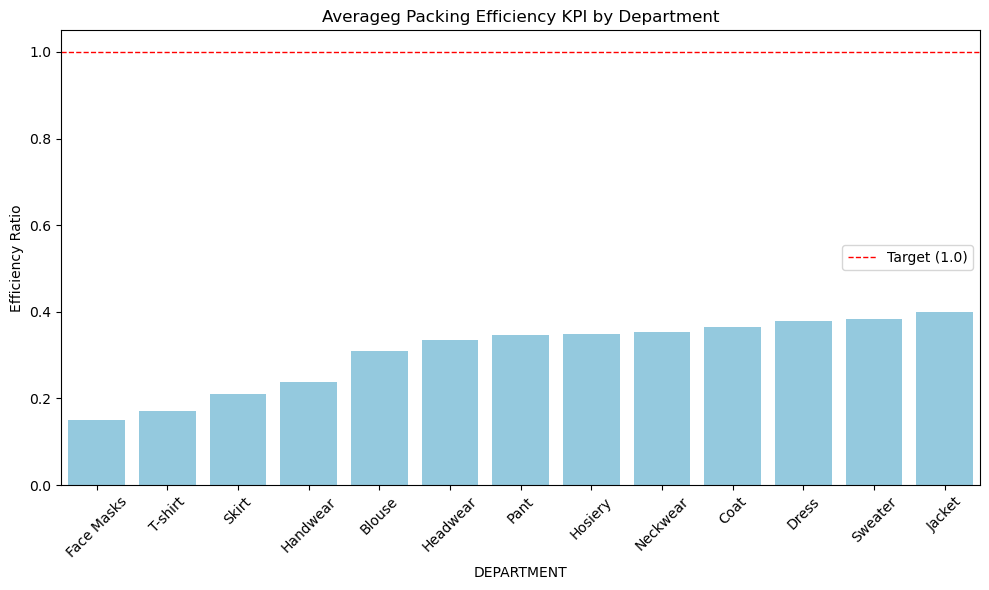

In [28]:
group_summary_exploded = group_summary.explode("DEPARTMENT")
avg_eff_by_dept = group_summary_exploded.groupby("DEPARTMENT")["EFFICIENCY_KPI"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_eff_by_dept.index, y=avg_eff_by_dept.values, color="skyblue")
plt.title("Averageg Packing Efficiency KPI by Department")
plt.axhline(1, color="red", linestyle="--", linewidth=1, label="Target (1.0)")
plt.ylabel("Efficiency Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

# avg_eff_by_dept.plot(kind="barh", figsize=(10, 6), title="Avg Packing Efficiency by Department")

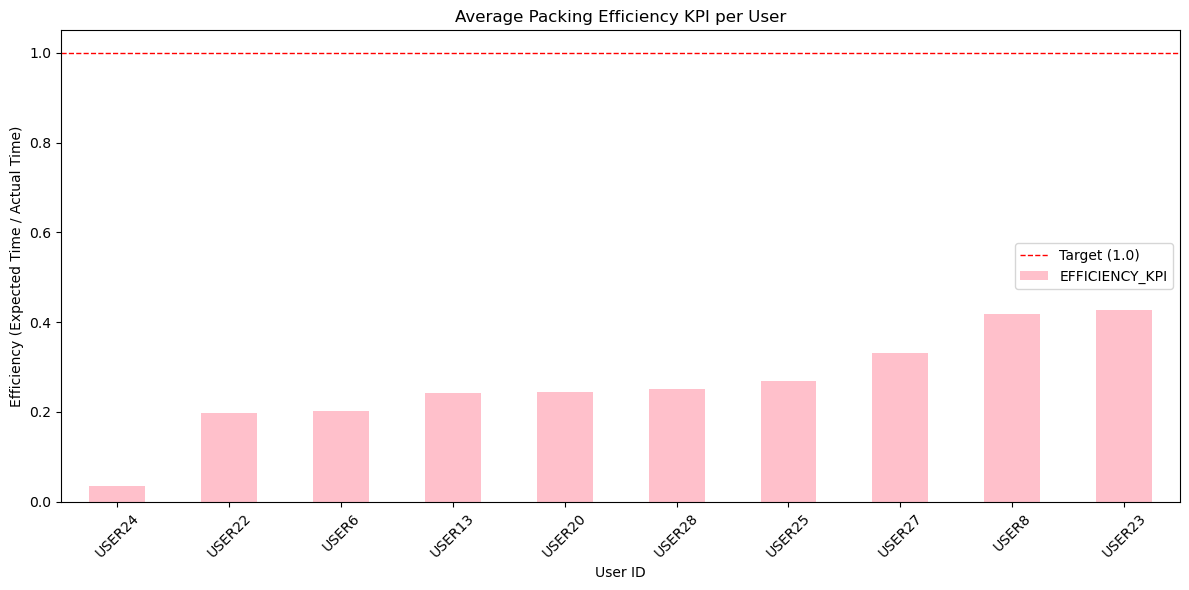

In [29]:
avg_kpi_per_user = group_summary.groupby("USER_ID")["EFFICIENCY_KPI"].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_kpi_per_user.plot(kind="bar", color="pink")

plt.title("Average Packing Efficiency KPI per User")
plt.ylabel("Efficiency (Expected Time / Actual Time)")
plt.xlabel("User ID")
plt.xticks(rotation=45)
plt.axhline(1, color="red", linestyle="--", linewidth=1, label="Target (1.0)")
plt.legend()
plt.tight_layout()

plt.show()


In [30]:
top_5 = avg_kpi_per_user.sort_values(ascending=False).head(5)
bottom_5 = avg_kpi_per_user.sort_values().head(5)

print("Top 5 Packers:\n", top_5)
print("\nBottom 5 Packers:\n", bottom_5)

Top 5 Packers:
 USER_ID
USER23    0.426199
USER8     0.419036
USER27    0.330265
USER25    0.269532
USER28    0.250377
Name: EFFICIENCY_KPI, dtype: object

Bottom 5 Packers:
 USER_ID
USER24    0.034069
USER22    0.198615
USER6      0.20324
USER13    0.242711
USER20    0.244045
Name: EFFICIENCY_KPI, dtype: object


Text(0.5, 1.0, 'Distribution of Packing Session Duration (seconds)')

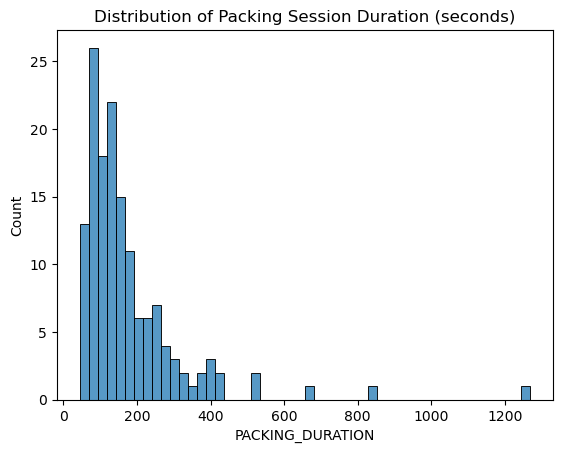

In [31]:
sns.histplot(group_summary["PACKING_DURATION"], bins=50)
plt.title("Distribution of Packing Session Duration (seconds)")

Text(0.5, 1.0, 'Expected vs. Actual Time with Efficiency Gradient')

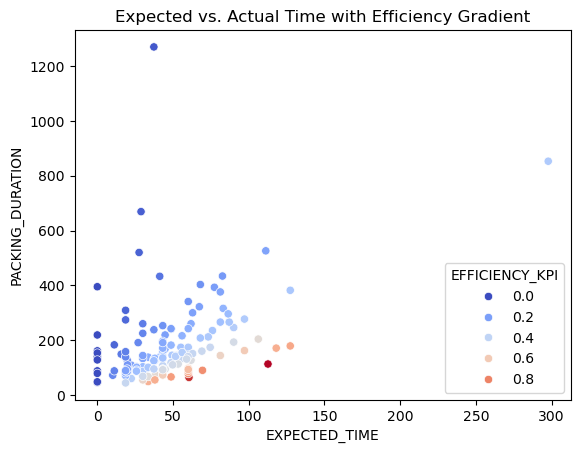

In [32]:
sns.scatterplot(
    data=group_summary,
    x="EXPECTED_TIME",
    y="PACKING_DURATION",
    hue="EFFICIENCY_KPI",
    palette="coolwarm"
)
plt.title("Expected vs. Actual Time with Efficiency Gradient")

In [33]:
avg_kpi_per_user

USER_ID
USER24    0.034069
USER22    0.198615
USER6      0.20324
USER13    0.242711
USER20    0.244045
USER28    0.250377
USER25    0.269532
USER27    0.330265
USER8     0.419036
USER23    0.426199
Name: EFFICIENCY_KPI, dtype: object

### SQL Queries
---

#### Filter to only Employees who have completed at least 1 Packing Transactions (PKOCLOSE)
``` sql
CREATE TABLE Filtered_Transactions AS
SELECT *
FROM Transactions
WHERE USER_ID IN (
    SELECT DISTINCT USER_ID
    FROM Transactions
    WHERE ACTION_CODE = 'PKOCLOSE'
);
```



#### Join filtered_transaction with Article data and Packing Standards 
``` sql
WITH joined_data AS (
    SELECT 
        t.USER_ID,
        t.TRANSACTION_TIMESTAMP,
        a.DEPARTMENT,
        t.QUANTITY,
        s.STANDARD_TIME,
        t.QUANTITY * s.STANDARD_TIME AS EXPECTED_TIME
    FROM Filtered_Transactions t
    JOIN Article_Master a ON t.ARTICLE = a.MATERIAL
    JOIN Standards s ON a.DEPARTMENT = s.DEPARTMENT
    WHERE t.ACTION_CODE = 'PKOCLOSE'
),
```

#### Group to form packing session by user and timestamp  
``` sql
sessions AS (
    SELECT 
        USER_ID,
        TRANSACTION_TIMESTAMP,
        SUM(EXPECTED_TIME) AS SESSION_EXPECTED_TIME,
        COUNT(*) AS ITEMS_IN_SESSION
    FROM joined_data
    GROUP BY USER_ID, TRANSACTION_TIMESTAMP
)
```

#### Estimate actual time using previous timestamps 
```sql
sessions_prev_time AS (
    SELECT 
        USER_ID,
        TRANSACTION_TIMESTAMP,
        SESSION_EXPECTED_TIME,
        LAG(TRANSACTION_TIMESTAMP) OVER (
            PARTITION BY USER_ID ORDER BY TRANSACTION_TIMESTAMP
        ) AS PREV_TIMESTAMP
    FROM sessions
),

kpi AS (
    SELECT *,
        EXTRACT(EPOCH FROM TRANSACTION_TIMESTAMP - PREV_TIMESTAMP) AS ACTUAL_DURATION,
        CASE 
            WHEN EXTRACT(EPOCH FROM TRANSACTION_TIMESTAMP - PREV_TIMESTAMP) = 0 THEN NULL
            ELSE SESSION_EXPECTED_TIME / EXTRACT(EPOCH FROM TRANSACTION_TIMESTAMP - PREV_TIMESTAMP)
        END AS EFFICIENCY_KPI
    FROM sessions_with_kpi
)
```

#### Final output is session-level packing efficiency KPI
```sql
SELECT *
FROM kpi
```

### Forcast Query 
##### Assuming a `Forecast_Demand` table exists with DATE, DEPARTMENT, EXPECTED_QUANTITY, STANDARD_TIME 

NOTE: 8 * 60 is assuming 8 hour shift, aligned with given data 

```sql
SELECT 
    DATE,
    DEPARTMENT,
    SUM(EXPECTED_QUANTITY * STANDARD_TIME) / (8 * 60) AS PACKERS_NEEDED
FROM Forecast_Demand
GROUP BY DATE, DEPARTMENT;

```